# Advance ML final project
# Rohit SALURU

In [1]:
# importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the csv file in Jupyter notebook and loading it into a data frame
df=pd.read_csv('housing.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


Doing general checks of the data frame

In [3]:
df.shape

(384977, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [5]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [6]:
df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

Before imputing the null values let's remove the unwanted features as these features does not play any role in the estimation of house rent

In [7]:
df=df.drop(["id","url","region_url","image_url","description"],axis=1)

With region name itself we can know in which state the house is located , so there is no use for this state column. so we can remove this state column also.

In [8]:
df=df.drop(["state"],axis=1)

The important features are sqfeet,region,type,no of bedrooms and bathrooms Other features also play a role for rental price but that is of less importance But we can take the other features also for estimation, as all those combining together play some role in estimation.

Now let's impute the null values with proper values of central tendencies


In [9]:
df['laundry_options'] = df['laundry_options'].fillna(df['laundry_options'].mode()[0])
df['parking_options'] = df['parking_options'].fillna(df['parking_options'].mode()[0])
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())

In [10]:
# Checking how many values present
df.laundry_options.value_counts()

w/d in unit           210809
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

In [11]:
# Checking how many values present
df.parking_options.value_counts()

off-street parking    269189
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: parking_options, dtype: int64

In [12]:
# Checking how many values present
df.region.value_counts()

jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: region, Length: 404, dtype: int64

In [13]:
# Checking how many values present
df.type.value_counts()

apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: type, dtype: int64

In [14]:
# Checking how many values present
df.baths.value_counts()

1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: baths, dtype: int64

In [15]:
# we can convert this float values to int
df["baths"]=df["baths"].astype("int")

In [16]:
# Checking how many values present
df.beds.value_counts()

2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

A house can have maximum of 4 bedrooms and above that are not the normal range

so we can remove the entries above 4

If there is maximum of 4 bedrooms then the bathroom will be maximum of 4

So we can remove the values above 4

Checking total number of outliers 

In [17]:
outlier1 = ((df["beds"]>4) | (df["baths"]>4))
print("There is {} outlier".format(df[outlier1]["beds"].count()))

There is 2705 outlier


In [18]:
df = df[~outlier1]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqfeet'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'cats_allowed'}>,
        <AxesSubplot:title={'center':'dogs_allowed'}>],
       [<AxesSubplot:title={'center':'smoking_allowed'}>,
        <AxesSubplot:title={'center':'wheelchair_access'}>,
        <AxesSubplot:title={'center':'electric_vehicle_charge'}>],
       [<AxesSubplot:title={'center':'comes_furnished'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>]], dtype=object)

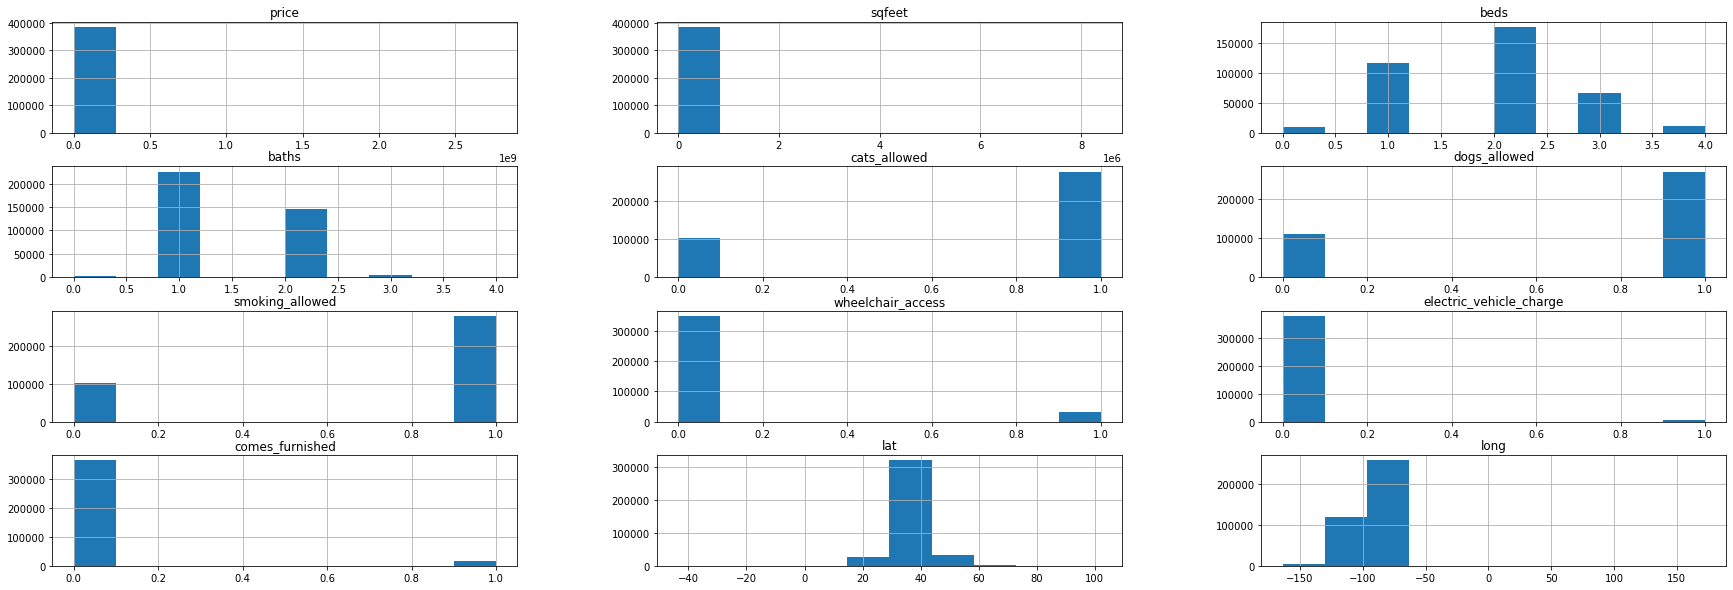

In [19]:
df.hist(figsize=(30,10))

In [20]:
outlier2 = ((df["sqfeet"]<120) | (df["sqfeet"]>5000) | (df["price"]<100) | (df["price"]>10000))
print("There is {} outlier".format(df[outlier2]["cats_allowed"].count()))

There is 3564 outlier


In [21]:
df = df[~outlier2]

In [22]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000,378708.000000
mean,1182.050028,985.397074,1.871183,1.418607,0.729335,0.709850,0.732100,0.082441,0.012965,0.047189,37.225018,-92.686089
std,578.570298,358.886606,0.836630,0.559848,0.444304,0.453832,0.442866,0.275036,0.113124,0.212044,5.534498,16.493729
min,100.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,810.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.466900,-99.772400
50%,1040.000000,947.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.560950,-87.855900
75%,1395.000000,1144.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.127700,-81.225600
max,9999.000000,5000.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


we can see there are two columns named dogs_allowed & cats_allowed
we can combine those make a single column

In [23]:
df=df.drop(["cats_allowed"],axis=1)
df.rename(columns = {'dogs_allowed':'pets_allowed'}, inplace = True) 

# Data Visualization


C:\Users\Rohit Saluru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house is more')

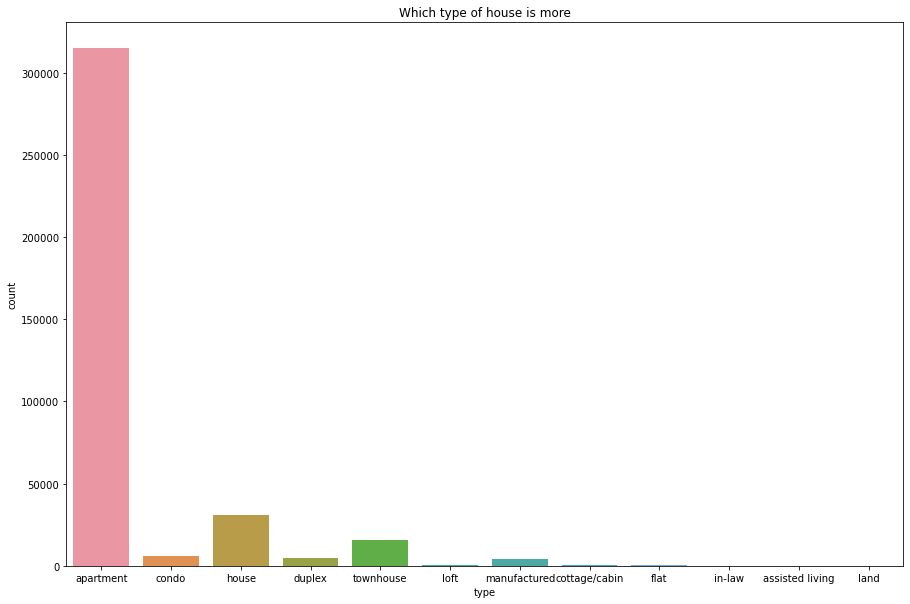

In [24]:
sns.countplot(df["type"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house is more')

Text(0.5, 1.0, 'Which type of house has more price')

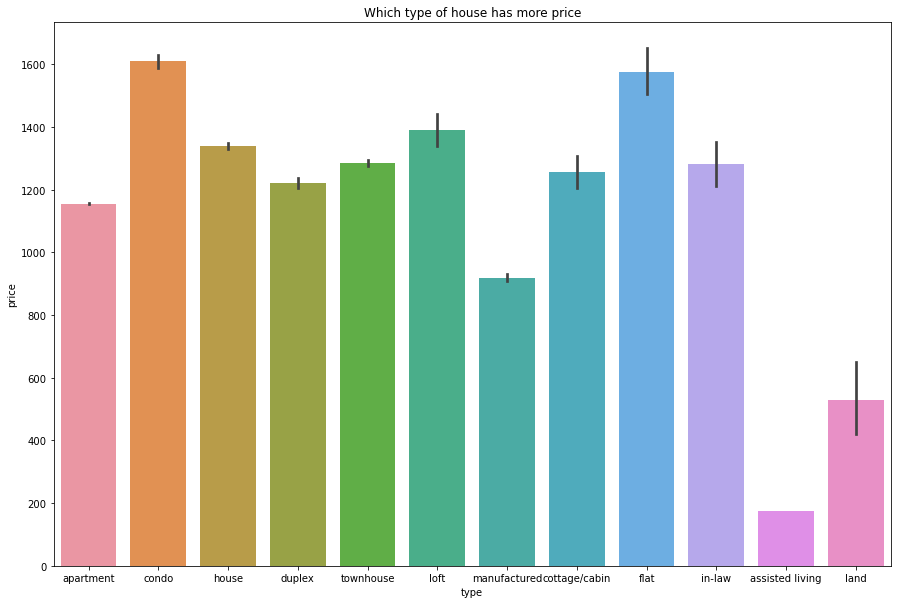

In [25]:
sns.barplot(x=df["type"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house has more price')

Text(0.5, 1.0, 'Which type of house has more sqfeet')

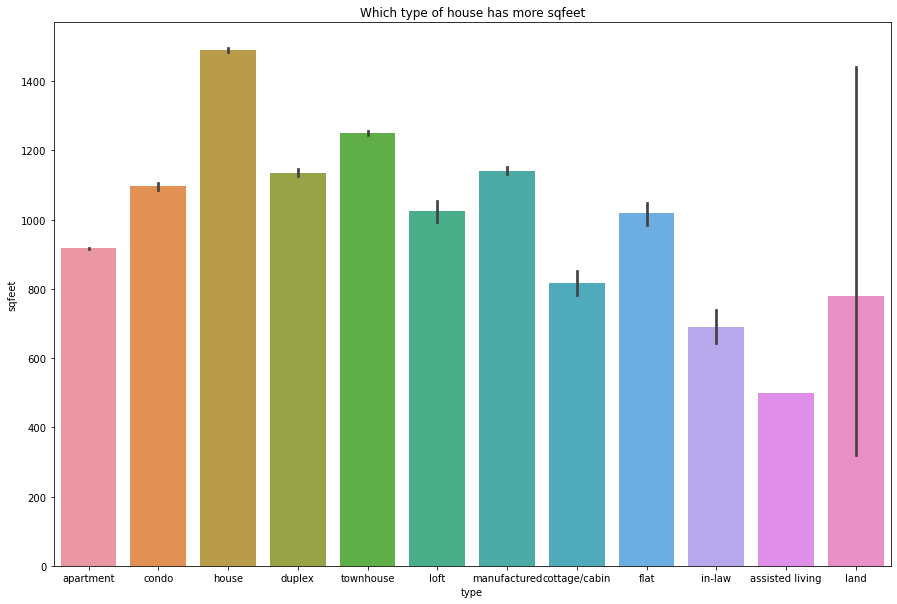

In [26]:
sns.barplot(x=df["type"],y=df["sqfeet"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of house has more sqfeet')

Text(0.5, 1.0, 'Which type of parking option has more price')

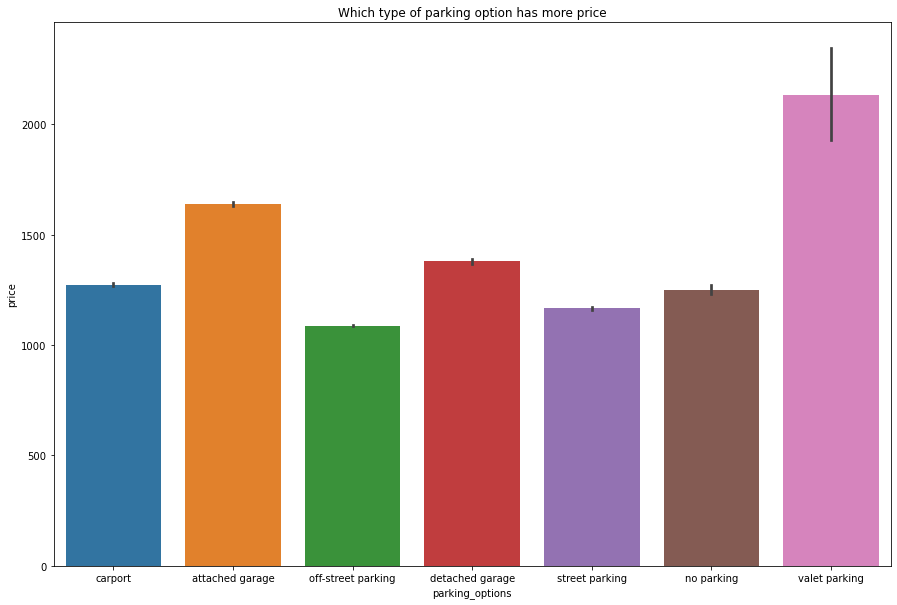

In [27]:
sns.barplot(x=df["parking_options"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Which type of parking option has more price')

# Label Encoding the categorical string values


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()
db=df

In [30]:
db["region"]=le.fit_transform(df["region"])
db["type"]=le.fit_transform(df["type"])
db["laundry_options"]=le.fit_transform(df["laundry_options"])
db["parking_options"]=le.fit_transform(df["parking_options"])

In [31]:
db.head()

,region,price,type,sqfeet,beds,baths,pets_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,286,1148,0,1078,3,2,1,0,0,0,0,4,1,39.5483,-119.796
1,286,1200,2,1001,2,2,0,0,0,0,0,3,1,39.5026,-119.789
2,286,1813,0,1683,2,2,1,1,0,0,0,4,0,39.6269,-119.708
3,286,1095,0,708,1,1,1,1,0,0,0,4,1,39.4477,-119.771
4,286,289,0,250,0,1,1,1,1,0,1,1,4,39.5357,-119.805


In [32]:
x=db.drop(columns=["price"])
y=db["price"]

# Scatter plot to understand the relation 

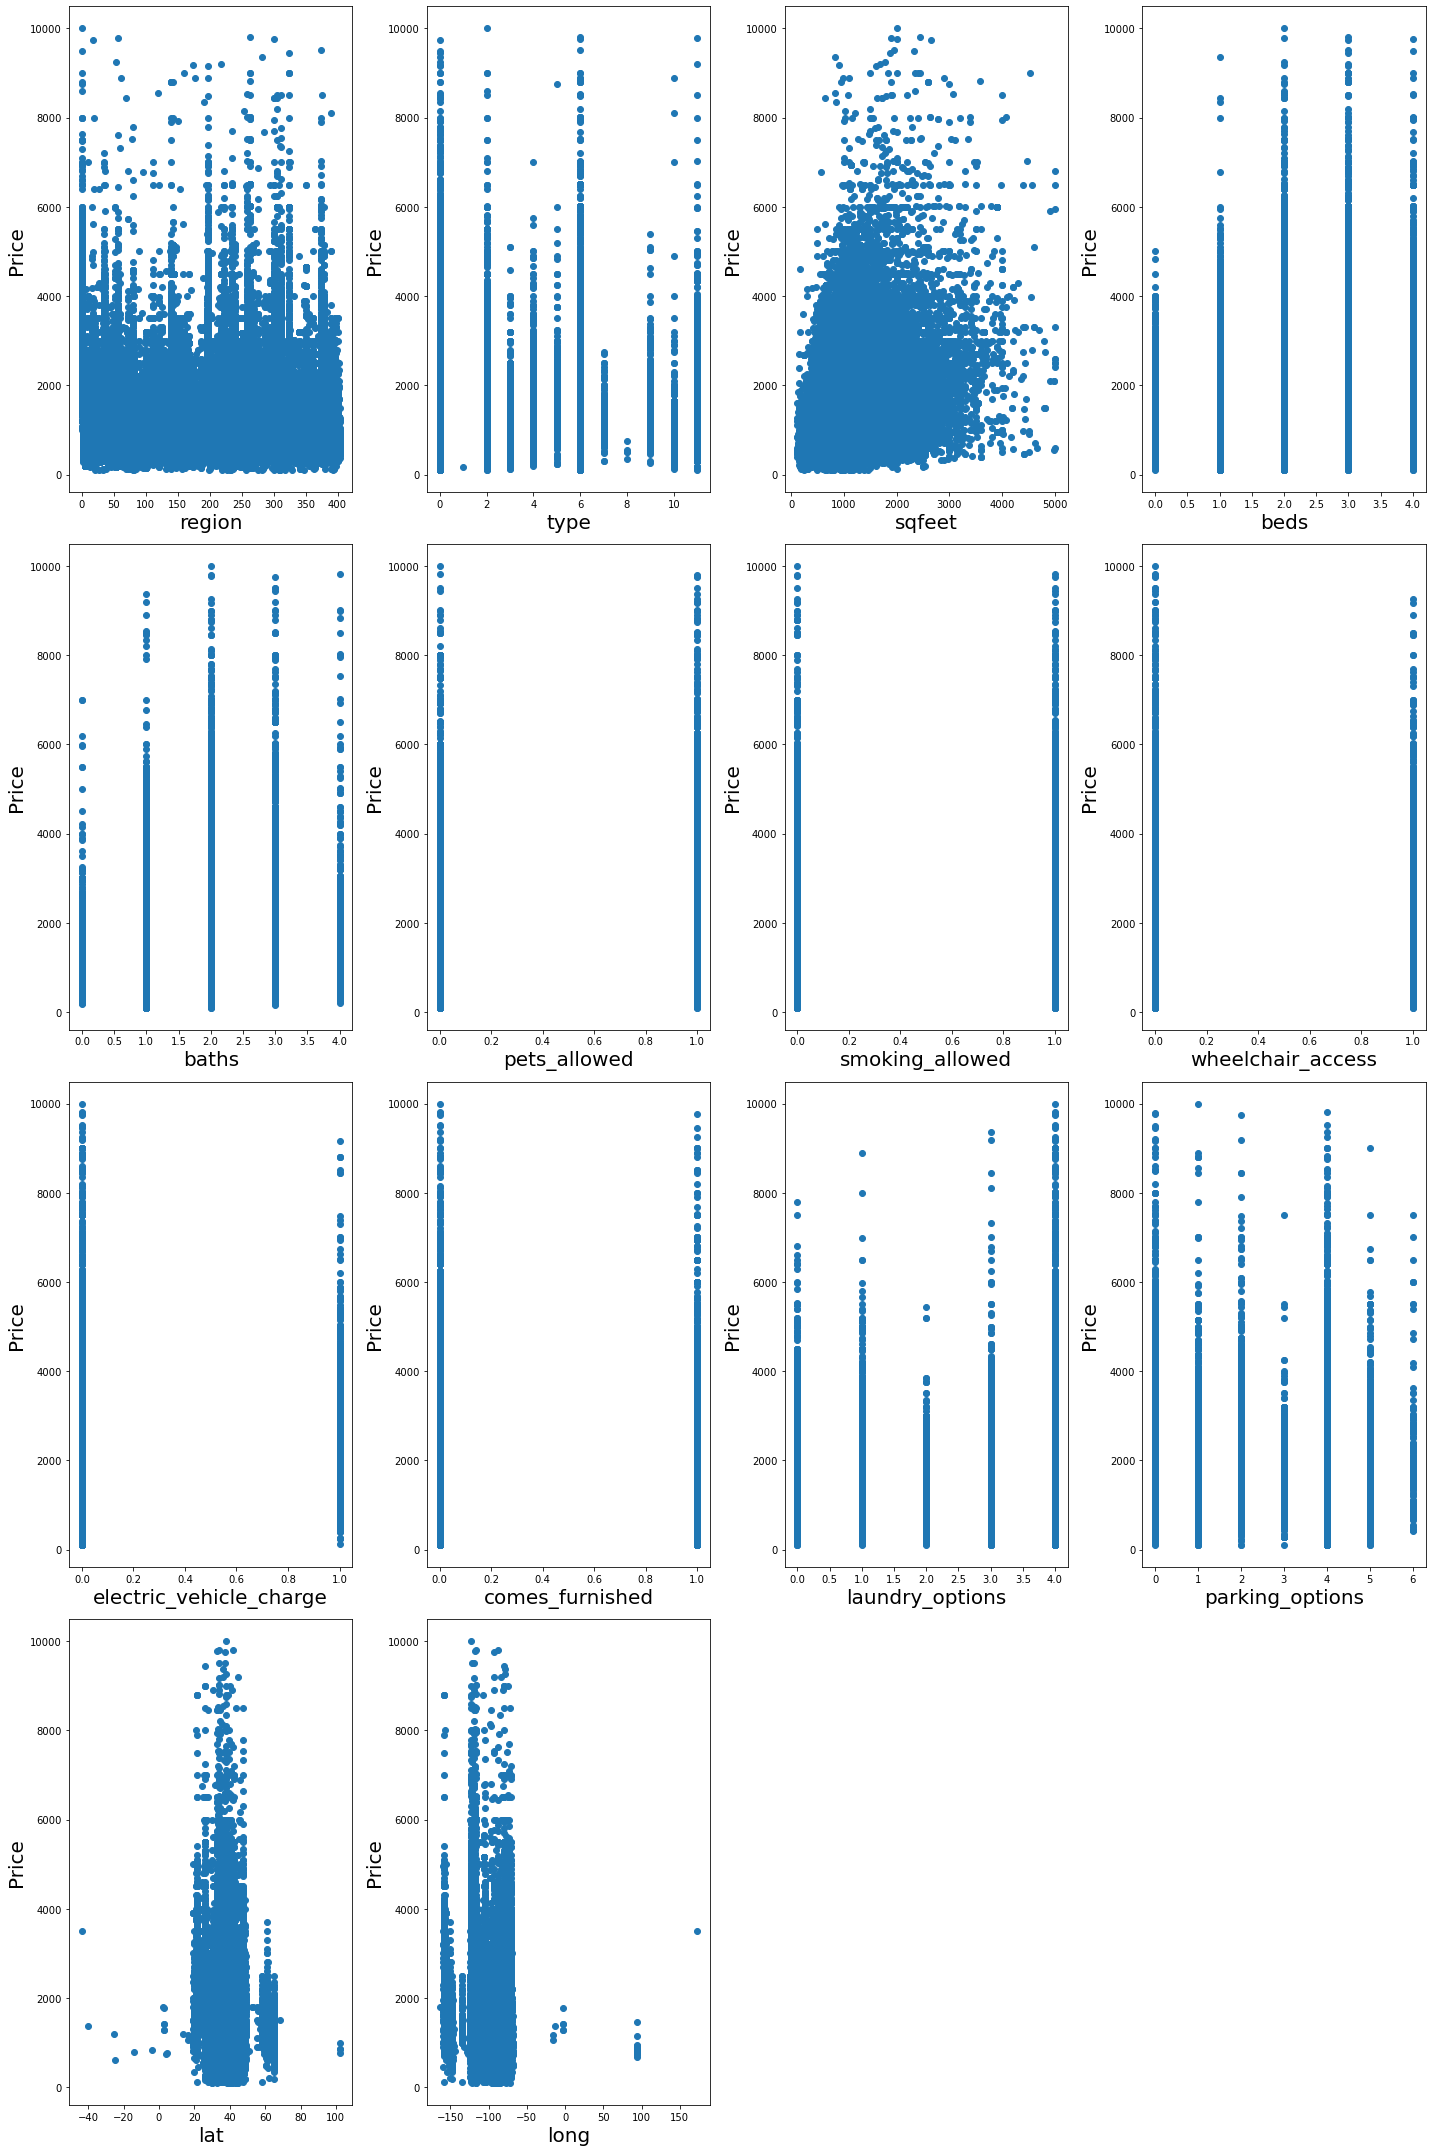

In [33]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [35]:
x_scaled

array([[ 0.83521157, -0.4094427 ,  0.25802871, ..., -1.49620644,
         0.41978241, -1.64365176],
       [ 0.83521157,  0.29128069,  0.04347598, ..., -1.49620644,
         0.4115251 , -1.64322736],
       [ 0.83521157, -0.4094427 ,  1.94380017, ..., -2.16897359,
         0.43398425, -1.6383164 ],
       ...,
       [ 0.83521157, -0.4094427 , -0.40513428, ...,  0.52209501,
         0.41752384, -1.6406203 ],
       [ 0.83521157, -0.4094427 , -0.026184  , ..., -1.49620644,
         0.42162539, -1.63801325],
       [ 0.83521157, -0.4094427 , -0.07912558, ..., -1.49620644,
         0.40160549, -1.64213603]])

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,1.010572,region
1,1.251840,type
2,2.676439,sqfeet
3,2.551361,beds
4,1.809763,baths
5,1.041256,pets_allowed
6,1.148839,smoking_allowed
7,1.155999,wheelchair_access
8,1.053079,electric_vehicle_charge
9,1.066557,comes_furnished


Also checking multicollinearity with heatmap

<AxesSubplot:>

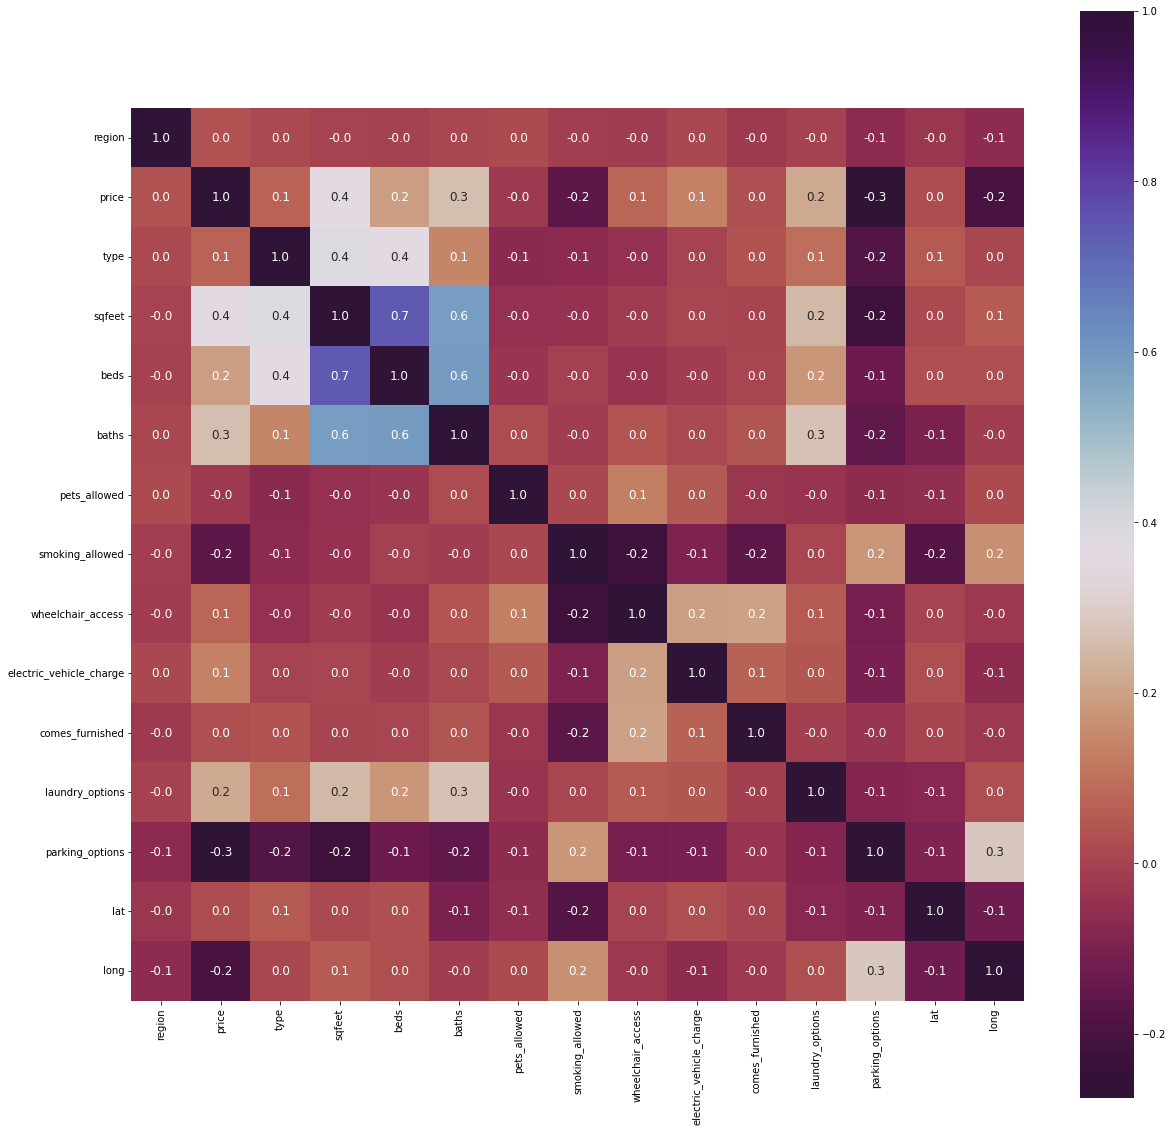

In [37]:
corrl = db.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrl, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':12}, cmap='twilight_shifted_r')

From the above graph and the vif we can say that there is no multicollinearity in this dataset

# Splitting the dataset for train and test

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state=470)

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Importing the models for training the dataset

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
!pip install catboost
import catboost
from catboost import CatBoostRegressor

In [53]:
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=101, max_depth = 40)
lin = LinearRegression()
cb =  CatBoostRegressor(
    n_estimators = 10000, # iterations, n_estimators, num_boost_round, num_trees, default is 1000
    random_seed = 42,
    loss_function = 'RMSE',
    custom_metric = 'R2',
    #allow_writing_files = False,
    logging_level = 'Silent',
)

In [54]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 40,max_depth=25,min_samples_split=2, learning_rate=0.1,loss='ls')

In [55]:
models = {"Decision tree" : dtr,
          "Random forest" : ran,
          "Linear Regression" : lin,
          "Gradient Boosting Regressor" : clf,
         "Cat boost ": cb }
scores= { }

In [56]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

C:\Users\Rohit Saluru\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [58]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.871557
Cat boost,0.814872
Gradient Boosting Regressor,0.809166
Decision tree,0.753554
Linear Regression,0.248589


we can see that the Random Forest Regression is giving good results than other models

# Model Evaluation


In [59]:
y_pred=ran.predict(x_test)

In [60]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8715571560531137
Adjusted R^2: 0.8715512204403735
MAE: 79.03207937290453
MSE: 43765.029358037194
RMSE: 209.20093058597325


By comparing the above results we can take the Random forest Regressor for the estimation of house rent, with Random forrest regressor we can estimate the house rent with 87.15% accuracy